In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import scipy as sp
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from EM import EM

%matplotlib inline

In [2]:
# read the image
img = plt.imread('./corgi.png')[:, :, :3]

In [3]:
# define colors in a hash table
colors = {1: 'b', 2: 'g', 3: 'r', 4: 'c', 5: 'm', 6: 'y', 7: 'k', 8: 'w', 9: '#FFA500', 10: '#006400'}

In [8]:
# reshape the input vector
x = np.reshape(img, (-1, 3))

Break, reach the threshold at 24 th iteration !


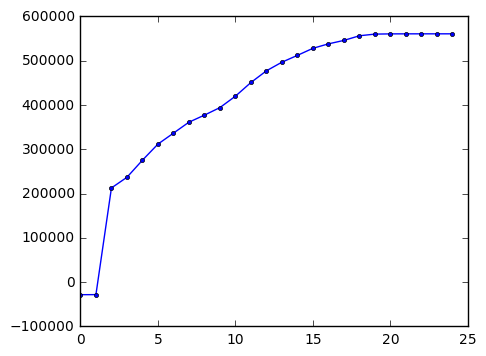

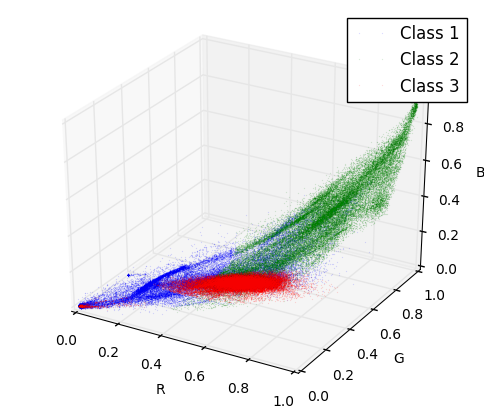

In [9]:
# train the EM model
m = 3
em = EM(m=m, threshold=0.00001, maxIter=100)

em.train(x)

# get all parameters
w, mu, sigma, logLikelihood = em.get_params()
# get the label
label = em.get_label()

# plot the likelihood
plt.figure(figsize=(5, 4))
plt.plot(logLikelihood, 'o-', markersize=3)
plt.show()

# plot the clustered data
# %matplotlib qt
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, m + 1):
    data = x[label == i]
    ax.plot(data[:, 0], data[:, 1], data[:, 2], '.', color=colors[i], 
            markersize=1, alpha=0.1, label='Class ' + str(i))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.legend()
plt.show()

In [11]:
print('w:\n', np.round(w, 5))
print('\nmu:\n', np.round(mu, 5))
print('\nsigma:\n', np.round(sigma, 5))

w:
 [ 0.27117  0.30437  0.42446]

mu:
 [[  3.60200000e-01   3.40460000e-01   9.51500000e-02]
 [  7.68280000e-01   6.00150000e-01   4.21980000e-01]
 [  3.67810000e-01   4.12000000e-01   7.30000000e-04]]

sigma:
 [[[ 0.03939  0.03367  0.01276]
  [ 0.03367  0.03667  0.00673]
  [ 0.01276  0.00673  0.01129]]

 [[ 0.02052  0.02227  0.02387]
  [ 0.02227  0.02626  0.03   ]
  [ 0.02387  0.03     0.03717]]

 [[ 0.03587  0.037   -0.00027]
  [ 0.037    0.04156 -0.0003 ]
  [-0.00027 -0.0003   0.     ]]]


## 5 mixtures

Break, reach the threshold at 24 th iteration !


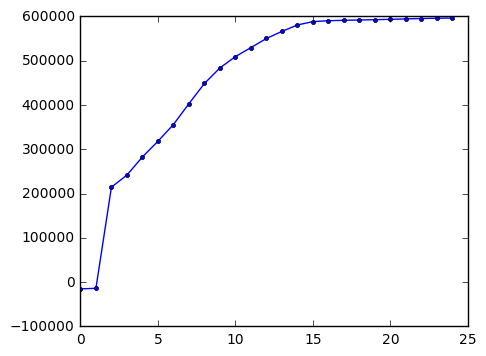

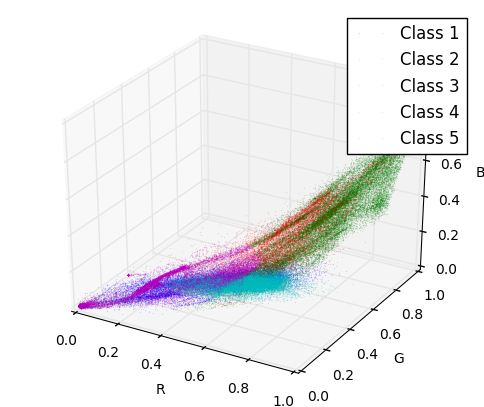

In [15]:
# train the EM model
m = 5
em = EM(m=m, threshold=0.001, maxIter=100)

em.train(x)

# get all parameters
w, mu, sigma, logLikelihood = em.get_params()
# get the label
label = em.get_label()

# plot the likelihood
plt.figure(figsize=(5, 4))
plt.plot(logLikelihood, 'o-', markersize=3)
plt.show()

# plot the clustered data
# %matplotlib qt
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, m + 1):
    data = x[label == i]
    ax.plot(data[:, 0], data[:, 1], data[:, 2], '.', color=colors[i], 
            markersize=1, alpha=0.1, label='Class ' + str(i))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.legend()
plt.show()

## 10 mixtures

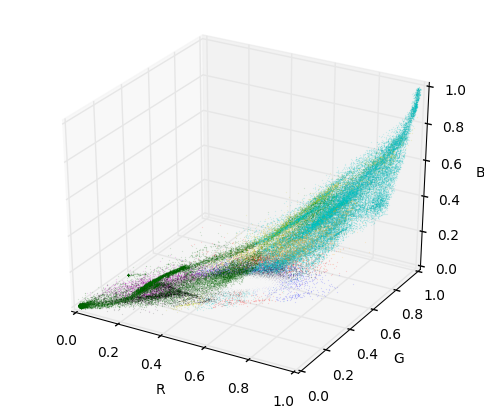

In [19]:
# train the EM model
m = 10
em = EM(m=m, threshold=0.001, maxIter=100)

em.train(x)

# get all parameters
w, mu, sigma, logLikelihood = em.get_params()
# get the label
label = em.get_label()

# plot the likelihood
plt.figure(figsize=(6, 5))
plt.plot(logLikelihood, 'o-', markersize=3)
plt.show()

# plot the clustered data
# %matplotlib qt
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, m + 1):
    data = x[label == i]
    ax.plot(data[:, 0], data[:, 1], data[:, 2], '.', color=colors[i], 
            markersize=1, alpha=0.1, label='Class ' + str(i))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
# ax.legend(fontsize=8)
plt.show()

## Self figure

In [21]:
# read the image
img = plt.imread('./self.jpg')[:, :, :3]

In [24]:
# reshape the input vector
x = np.reshape(img, (-1, 3))

Break, reach the threshold at 1 th iteration !


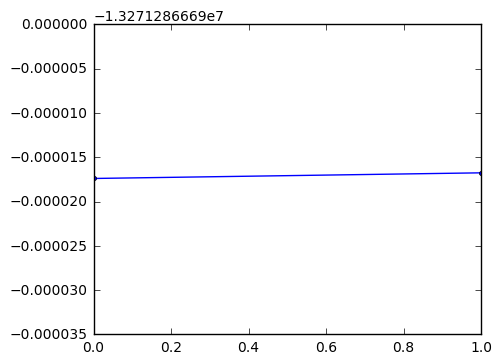

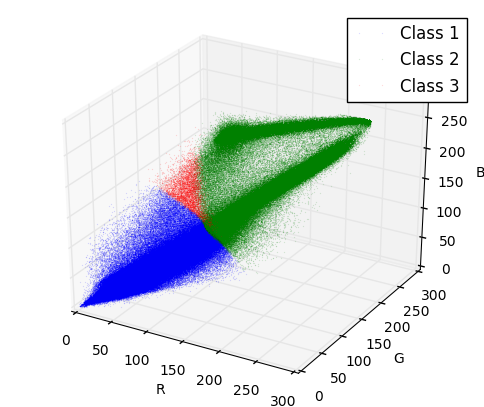

In [26]:
# train the EM model
m = 3
em = EM(m=m, threshold=0.00001, maxIter=100)

em.train(x)

# get all parameters
w, mu, sigma, logLikelihood = em.get_params()
# get the label
label = em.get_label()

# plot the likelihood
plt.figure(figsize=(5, 4))
plt.plot(logLikelihood, 'o-', markersize=3)
plt.show()

# plot the clustered data
# %matplotlib qt
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, m + 1):
    data = x[label == i]
    ax.plot(data[:, 0], data[:, 1], data[:, 2], '.', color=colors[i], 
            markersize=1, alpha=0.1, label='Class ' + str(i))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.legend()
plt.show()